<center>    
    
### Jhon Edwin Sanz González - Juan José Vera Arango
    
</center>

<center>
    
##### Artificial intelligence techniques
    
##### Master of systems engineering and computing
    
##### Universidad Tecnológica de Pereira
    
</center>

In [1]:
# Libraries for running

import numpy as np
import matplotlib.pyplot as plt

Para testear el algoritmo genético se escoge la función Price02, que es definida por 
$$ f_{Price02}(x) = 1 + \sin^2{x_1} + \sin^2{x_2} + 0.1e^{(-x^2_1-x^2_2)} $$

El número de dimensiones es igual a 2 y $ x_i \in [-10, 10]$ para $ i = {1,2} $

![png](images/price02.png)

Su optimo global está definidio en $ f(x_i) = 0.9 $ para $ x_i = 0; i = {1,2} $

Entonces lo que vamos a hacer es hallar la longitud del cromosoma de $ x_1 $ y $ x_2 $.

La longitud esta definida como la resta del intervalo y vamos a trabajar con 3 decimales, entonces a este resultado lo multplicamos por cien (100).

Como el intervalo de las 2 variables es el mismo, entonces solo haremos un cálculo.

In [2]:
n = 2
interval = [-10, 10]
decimal_number = 3
accuracy = 10**(decimal_number-1)
longitude = (interval[-1] - interval[0]) * accuracy
chromosoma = int(np.ceil(np.log2(longitude)))
print('longitude: {}\nchromosoma: 2^{}\nvalue of chromosoma: {}'.format(longitude, chromosoma, 2**chromosoma))

longitude: 2000
chromosoma: 2^11
value of chromosoma: 2048


La longitud del vector solución, es la suma de las 2 longitudes de las variables, entonces, podemos averiguar cual es la cantidad del espacio de Banach y el tamaño de la población

In [3]:
longitude_vector = chromosoma + chromosoma
banach_space = 2**longitude_vector
population_size = int(round(1.65 * 2**(0.2 * longitude_vector),0))
print('Longitude Vector: {}\nBanach space: {}\nPopulation size: {}'.format(
    longitude_vector, banach_space, population_size))

Longitude Vector: 22
Banach space: 4194304
Population size: 35


Definimos la función de distancia hamming, para cuando se esten creando los vectores de la población, no tener endogamia. Asi nos aseguramos la diversidad de nuestra población.

In [4]:
def hamming_distance(vector_a, vector_b):
    distance_x1 = np.count_nonzero(vector_a['x1']!=vector_b['x1'])
    distance_x2 = np.count_nonzero(vector_a['x2']!=vector_b['x2'])
    return distance_x1 + distance_x2

Para convertir el valor de una variable con la siguiente fórmula, como las variables tienen la misma longitud e intervalo, la fórmula funciona para ambas variables. 
$$ x = -10 + decimal(binario) * \frac {10-(-10)} {2^{11} - 1} $$

Ahora vamos a generar la población, que son 35 vectores soluciones, los cuales se construiran de forma aleatoria, pero siempre teniendo en cuenta, de que el vector generado, no sea pariente de los vectores que ya tenemos creados, esto lo medimos con la distancia Hamming, y nuestro factor de medición es que sea mayor que 3 en distancia Hamming, ya que se escogen que sea mayor al 10% de la longitud de los vectores. El 10% de 22, es 2.2, entonces lo llevamos al siguiente entero, osea 3.

In [5]:
vectors = {}
    
while len(vectors) < population_size:
    vector = {'x1': np.random.choice([0, 1], size=[chromosoma]), 
        'x2': np.random.choice([0, 1], size=[chromosoma])}
    
    for key, vector_to_comparate in vectors.items():
        distance = hamming_distance(vector, vector_to_comparate)
        if distance < 3: break
    else:
        vectors['v{}'.format(len(vectors)+1)] = vector 
    
vectors

{'v1': {'x1': array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]),
  'x2': array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])},
 'v2': {'x1': array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]),
  'x2': array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1])},
 'v3': {'x1': array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]),
  'x2': array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0])},
 'v4': {'x1': array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1]),
  'x2': array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])},
 'v5': {'x1': array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]),
  'x2': array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])},
 'v6': {'x1': array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]),
  'x2': array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0])},
 'v7': {'x1': array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0]),
  'x2': array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])},
 'v8': {'x1': array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]),
  'x2': array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0])},
 'v9': {'x1': array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]),
  'x2': array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])},
 'v10': {'x1': array([1, 1, 1, 1, 1, 

Ahora, calculamos la función objetivo de cada vector, la función objetivo, es calcular la función escogida Price02, su valor, con el valor en decimal, de las variables del vector.

In [6]:
def decimal_variable(variable):
    return int('0b{}'.format(''.join(str(v) for v in variable)), 2)

def value_variable(variable):
    return round(-10+decimal_variable(variable)*(20/((2**chromosoma)-1)), decimal_number)

def price02(x1, x2):
    return (1 + np.power(np.sin(x1), 2) + np.power(np.sin(x2), 2) 
            - 0.1*np.exp((np.power(x1,2) * -1) - (np.power(x2,2))))

def evaluation_vector(vector):
    x1 = value_variable(vector['x1'])
    x2 = value_variable(vector['x2'])
    objetive_function = round(price02(x1, x2), 3)
    return x1, x2, objetive_function

def print_vector(vector):
    evaluation = evaluation(vector)
    print('--------------------------------------')
    print('x1: {}\nx2: {}\nObjetive Function: {}'.format(evaluation[0], evaluation[1], evaluation[2]))
    print('--------------------------------------')

In [7]:
for name, vector in vectors.items():
    evaluation = evaluation_vector(vector)
    vectors[name]['value_x1'] = evaluation[0]
    vectors[name]['value_x2'] = evaluation[1]
    vectors[name]['FO'] = evaluation[2]

vectors

{'v1': {'x1': array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]),
  'x2': array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0]),
  'value_x1': -0.63,
  'value_x2': 4.167,
  'FO': 2.078},
 'v2': {'x1': array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]),
  'x2': array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1]),
  'value_x1': 1.207,
  'value_x2': 4.138,
  'FO': 2.578},
 'v3': {'x1': array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]),
  'x2': array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]),
  'value_x1': 2.233,
  'value_x2': 3.522,
  'FO': 1.76},
 'v4': {'x1': array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1]),
  'x2': array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]),
  'value_x1': -6.277,
  'value_x2': 9.814,
  'FO': 1.144},
 'v5': {'x1': array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]),
  'x2': array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]),
  'value_x1': 7.938,
  'value_x2': 8.671,
  'FO': 2.461},
 'v6': {'x1': array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]),
  'x2': array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]),
  'value_x1': 9.463,
  'value_x2': -5.877,
  'FO': 1.158},
 'v7': {'x1': a

In [8]:
ordered_vectors = dict(sorted(vectors.items(), key=lambda vector: vector[1]['FO'], reverse=True))
ordered_vectors

{'v21': {'x1': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]),
  'x2': array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1]),
  'value_x1': -7.469,
  'value_x2': -4.734,
  'FO': 2.859},
 'v32': {'x1': array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1]),
  'x2': array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]),
  'value_x1': -7.86,
  'value_x2': -1.177,
  'FO': 2.853},
 'v31': {'x1': array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0]),
  'x2': array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]),
  'value_x1': 2.018,
  'value_x2': 1.578,
  'FO': 2.813},
 'v22': {'x1': array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]),
  'x2': array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]),
  'value_x1': 1.119,
  'value_x2': -4.861,
  'FO': 2.787},
 'v29': {'x1': array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0]),
  'x2': array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]),
  'value_x1': 4.597,
  'value_x2': -5.379,
  'FO': 2.604},
 'v2': {'x1': array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]),
  'x2': array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1]),
  'value_x1': 1.207,
  'value_x2': 4.138,
  'FO': 2.578},
 'v30'

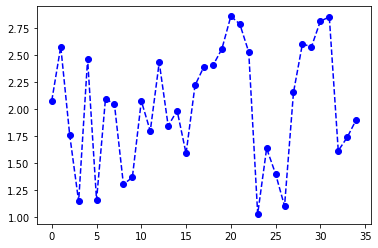

In [17]:
x = range(population_size)
y = list(map(lambda vector: vector['FO'], vectors.values()))
plt.plot(x, y, 'bo--')
plt.show()

http://infinity77.net/global_optimization/test_functions_nd_P.html#go_benchmark.Price02